# Table of Contents


*   Imports & Data Upload
    - Imports
        * Libraries
        * Pandas Profiling
        * Joblib
    - Data Upload
*   Functions
*   Data Wrangle & Exploration
    - Data Wrangle
    - Pandas Profiling
*   Data Visualizations
*   Tokenize and Vectorize 'House Rules'
*   Model Building
    - Manual Encoding
    - Train Test Split
    - Nueral Network Models
    - Save Best Model



# Imports & Data Upload


## Imports

In [1]:
# General
import numpy as np
import pandas as pd
import re
from datetime import datetime
import math

# Plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
import sklearn.metrics


# Deep Learning
import tensorflow as tf
from keras import models, layers, optimizers
from tensorflow.keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping

# Other
from sklearn.feature_extraction.text import TfidfVectorizer

### Pandas Profiling

In [2]:
# Pandas Profiling
# #### Uncomment to Reinstall #### #
!pip install pandas-profiling

In [3]:
from pandas_profiling import ProfileReport

## Data Upload

In [4]:
# Air BnB London Upload
# Source: https://public.opendatasoft.com/explore/dataset/airbnb-listings/table/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.city=London
# #### Uncomment to Upload #### #
# from google.colab import files
# upload = files.upload()

# Functions

In [4]:
def clean_string_list(text):
  '''
  Takes input text (string) which represents a list, returns 
  lowercase text with spaces after commas, and removes 
  leading and trailing whitespace

  ----
  Requirements: String
  '''

  # Ensure Input is a String
  text = str(text)

  # Remove Leading and Trailing Spaces
  text = text.strip()
  text = text.replace(',', ', ')

  return text.lower()

In [5]:
def string_to_list(text, delimiter=" "):
  '''
  Takes input text (string) which represents a list, and returns a list
  object of that text. Splits occur along specified delimiter
  ----
  
  Requirements: 
  - String
  - Delimiter; examples: ";", ",", "-"

  '''

  # Ensure Input is a String
  text = str(text)

  # Split
  li = list(text.split(delimiter))

  return li

In [6]:
def unique_list(my_list):
  '''
  Takes a list, and returns a new list of unique entries sorted alphabetically
  ----
  
  requirements:
  - List Object
  '''

  # Create New Empty List
  unique_list = set(my_list)
  unique_list = list(unique_list)
  
  return sorted(unique_list)

In [7]:
def list_to_columns(my_list):
  '''
  Takes a list and adds them to a dataframe
  ----

  Requirements:
  List Object
  '''

  for x in my_list:
    x = str(x)
    df[x] = ""

In [8]:
def string_to_datetime(date_time_string):
  'Takes a string, and converts to DateTime Object'

  # Check that value is not 0 nor NaN
  if date_time_string != None:

    # Ensure entry is string
    dt_str = str(date_time_string)
    # Convert
    dt_obj = datetime.strptime(dt_str, '%Y-%m-%d').date()

  return dt_obj

In [9]:
def string_to_numeric(text, numeric_type):
  'Takes a string, and returns a float, or int as specified'

  if numeric_type == 'integer':
    numbers = int(text)
    return numbers
  elif numeric_type == 'decimal':
    numbers = float(text)
    return numbers
  else:
    print("Please enter 'integer' for int, and 'decimal' for float.")

In [10]:
def string_to_int(text):
  'Takes a string, and returns an int'

  numbers = int(text)
  return numbers

In [11]:
def clean_text(text):
  'Returns Cleaned Text from Columns'

  # Ensure text is string
  text = str(text)
  
  # Regex
  punct_regex = r'[^0-9a-zA-Z\s]'
  spec_chars_regex = r'[\$\%\&\@\"\:+]'
  whitespace_regex = r"\s+\s"

  # Apply Regex
  text = re.sub(punct_regex, "  ", text)
  text = re.sub(spec_chars_regex, "  ", text)
  text = re.sub(whitespace_regex, " ", text)

  return text.lower()

In [12]:
def tokenize(doc):
  'Returns a list of parsed tokens'

  # List of Tokens
  tokens = []

  # Filter Stopwords, Punctuation, and White Space
  for token in nlp(doc):
    if (token.is_stop == False) & (token.is_punct == False) & (token.text.isspace() == False):
      tokens.append(token.text.lower())

  return tokens

# Data Wrangle & Exploration

## Wrangle

In [16]:
def wrangle(filepath):
  '''
  This function creates, and wrangles the data for use
  ----

  Requirements: Filepath to AirBnB Listings London; See above for download link
  '''

  # Create DataFrame
  df = pd.read_csv(filepath, sep=';')

  # #### If next cell gives an error df is not defined #### #
  # #### Comment Out Code with this block #### #
  # #### run this cell & the next cell, uncomment & run cells again #### #
  # Clean Up Columns
  # Drop Unnecessary/Redunant Columns
  cols_to_keep = [
        'House Rules', 'Host Since', 'Host Response Time',
        'Host Response Rate', 'Host Acceptance Rate', 'Host Listings Count',
        'Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Property Type', 
        'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 
        'Bed Type', 'Amenities', 'Square Feet', 'Price',
        'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 
        'Minimum Nights', 'Maximum Nights', 'Availability 30', 
        'Availability 60', 'Availability 90', 'Number of Reviews', 
        'Review Scores Rating', 'Cancellation Policy',
        ]

  df = df[cols_to_keep]
  # Rename Columns for Clarity
  df.rename(columns={
      'Neighbourhood Cleansed': 'Neighbourhood',
      'Property Type': 'Prop Type',
      'Square Feet': 'Square Ft', 
      'Guests Included': 'Guests Inc',
      'Extra People': 'XT People',
      'Minimum Nights': 'Min Nights',
      'Maximum Nights': 'Max Nights',
      'Availability 30': 'Avail 30',
      'Availability 60': 'Avail 60',
      'Availability 90': 'Avail 90',
      'Review Scores Rating': 'Rating',
      'Number of Reviews': 'Num Reviews',
      }, inplace=True)

  # Clean Up Column Names
  df.columns = df.columns.str.lower()
  df.columns = df.columns.str.strip()
  df.columns = df.columns.str.replace(' ', '_')

  # Fill House Rules NaNs with 'none' to avoid drop
  df['house_rules'] = df['house_rules'].fillna('none')

  # Drop Columns & Rows with Nulls Greater than 30% of total rows
  null_thresh = int(0.7*df.shape[0])
  df.dropna(axis=1, thresh=null_thresh, inplace=True)
  
  # Clean Up Column Data

  # Host Response Time 
  df['host_response_time'] = df['host_response_time'].replace({
      'within an hour': int(1),
      'within a few hours': int(1),
      'within a day': int(1),
      'a few days': int(0),
      'a few days or more': int(0),
      })
  df = df.rename(columns={'host_response_time': 'host_same_day_response'})

  # Neighborhood Clean Up
  # Anything with less than 100 listings changed to other
  df['neighbourhood'] = df['neighbourhood'].replace({
      'Redbridge': 'Other',
      'Bexley': 'Other',
      'Harrow': 'Other',
      'Barking and Dagenham': 'Other',
      'Kingston upon Thames': 'Other',
      'Hillingdon': 'Other',
      'Sutton': 'Other',
      'Havering': 'Other',
      })

  # Property Type Clean Up
  # Remove Non-Housing Options
  df = df[df.prop_type != 'Parking Space']
  # Reduce Options
  df['prop_type'] = df['prop_type'].replace({
      'Townhouse': 'House',
      'Loft': 'Apartment',
      'Dorm': 'Other',
      'Guesthouse': 'House',
      'Serviced apartment': 'Apartment',
      'Condominium': 'House',
      'Cabin': 'House',
      'Hostel': 'Hotel',
      'Bungalow': 'House',
      'Boutique hotel': 'Hotel',
      'Villa': 'House',
      'Camper/RV': 'Camping',
      'Castle': 'Other',
      'Yurt': 'Camping',
      'Chalet': 'House',
      'Hut': 'Camping',
      'Tent': 'Camping',
      'Ryokan (Japan)': 'Hotel',
      'Cave': 'Other',
      })
  
  # Room Type Clean Up
  # Change Options for Clarity
  df['room_type'] = df['room_type'].replace({
      'Entire home/apt': 'Entire Location',
      })
  
  # Cancellation Policy Clean Up
  df['cancellation_policy'] = df['cancellation_policy'].replace({
      'super_strict_30': 'strict'
      })
  
  # # Feature Engineering

  # Amenities Expanded
  # Clean Amenities Text
  df['amenities'] = df['amenities'].apply(clean_string_list)
  # Create Columns for Each Unique Ammentity Type
  amenities_list = [
                    '24_hr_checkin', 'air_conditioning', 'breakfast', 'cable', 
                    'cats_allowed', 'dogs_allowed','doorman', 'dryer', 'elevator', 
                    'family/kid_friendly', 'free_parking', 'gym', 'heating', 
                    'hot_tub', 'fireplace', 'internet', 'keypad', 'kitchen', 
                    'laptop_friendly_workspace', 'lock_on_bedroom_door', 'lockbox',
                    'pool', 'private_entrance', 'private_living_room', 
                    'safety_card', 'self_checkin', 'smartlock',
                    'smoking_allowed', 'events?', 'tv', 'washer',
                    'wheelchair_access',
                    ]
  list_to_columns(amenities_list)

  # Update Column Values to Boolean Yes (1), No (0) based on amenities column
  df.loc[((df.amenities.str.contains('24-hour')) == True), '24_hr_checkin'] = 1
  df.loc[((df.amenities.str.contains('24-hour')) == False), '24_hr_checkin'] = 0
  df.loc[((df.amenities.str.contains('conditioning')) == True), 
                                                      'air_conditioning'] = 1
  df.loc[((df.amenities.str.contains('conditioning')) == False), 
                                                      'air_conditioning'] = 0 
  df.loc[((df.amenities.str.contains('breakfast')) == True), 'breakfast'] = 1
  df.loc[((df.amenities.str.contains('breakfast')) == False), 'breakfast'] = 0
  df.loc[((df.amenities.str.contains('cable')) == True), 'cable'] = 1
  df.loc[((df.amenities.str.contains('cable')) == False), 'cable'] = 0
  df.loc[((df.amenities.str.contains('cat')) == True), 'cats_allowed'] = 1
  df.loc[((df.amenities.str.contains('cat')) == False), 'cats_allowed'] = 0
  df.loc[((df.amenities.str.contains('dog')) == True), 'dogs_allowed'] = 1
  df.loc[((df.amenities.str.contains('dog')) == False), 'dogs_allowed'] = 0
  df.loc[((df.amenities.str.contains('doorman')) == True), 'doorman'] = 1
  df.loc[((df.amenities.str.contains('doorman')) == False), 'doorman'] = 0
  df.loc[((df.amenities.str.contains('dryer')) == True), 'dryer'] = 1
  df.loc[((df.amenities.str.contains('dryer')) == False), 'dryer'] = 0
  df.loc[((df.amenities.str.contains('elevator')) == True), 'elevator'] = 1
  df.loc[((df.amenities.str.contains('elevator')) == False), 'elevator'] = 0
  df.loc[((df.amenities.str.contains('family/kid')) == True), 
                                                  'family/kid_friendly'] = 1
  df.loc[((df.amenities.str.contains('family/kid')) == False), 
                                                  'family/kid_friendly'] = 0
  df.loc[((df.amenities.str.contains('free parking')) == True), 
                                                  'free_parking'] = 1
  df.loc[((df.amenities.str.contains('free parking')) == False), 
                                                  'free_parking'] = 0
  df.loc[((df.amenities.str.contains('gym')) == True), 'gym'] = 1
  df.loc[((df.amenities.str.contains('gym')) == False), 'gym'] = 0
  df.loc[((df.amenities.str.contains('heating')) == True), 'heating'] = 1
  df.loc[((df.amenities.str.contains('heating')) == False), 'heating'] = 0
  df.loc[((df.amenities.str.contains('hot tub')) == True), 'hot_tub'] = 1
  df.loc[((df.amenities.str.contains('hot tub')) == False), 'hot_tub'] = 0
  df.loc[((df.amenities.str.contains('fireplace')) == True), 'fireplace'] = 1
  df.loc[((df.amenities.str.contains('fireplace')) == False), 'fireplace'] = 0
  df.loc[((df.amenities.str.contains('internet')) == True), 'internet'] = 1
  df.loc[((df.amenities.str.contains('internet')) == False), 'internet'] = 0
  df.loc[((df.amenities.str.contains('keypad')) == True), 'keypad'] = 1
  df.loc[((df.amenities.str.contains('keypad')) == False), 'keypad'] = 0
  df.loc[((df.amenities.str.contains('kitchen')) == True), 'kitchen'] = 1
  df.loc[((df.amenities.str.contains('kitchen')) == False), 'kitchen'] = 0
  df.loc[((df.amenities.str.contains('laptop')) == True), 
                                              'laptop_friendly_workspace'] = 1
  df.loc[((df.amenities.str.contains('laptop')) == False), 
                                              'laptop_friendly_workspace'] = 0
  df.loc[((df.amenities.str.contains('bedroom door')) == True), 
                                              'lock_on_bedroom_door'] = 1
  df.loc[((df.amenities.str.contains('bedroom door')) == False), 
                                              'lock_on_bedroom_door'] = 0
  df.loc[((df.amenities.str.contains('lockbox')) == True), 'lockbox'] = 1
  df.loc[((df.amenities.str.contains('lockbox')) == False), 'lockbox'] = 0
  df.loc[((df.amenities.str.contains('pool')) == True), 'pool'] = 1
  df.loc[((df.amenities.str.contains('pool')) == False), 'pool'] = 0
  df.loc[((df.amenities.str.contains('entrance')) == True), 
                                                  'private_entrance'] = 1
  df.loc[((df.amenities.str.contains('entrance')) == False), 
                                                  'private_entrance'] = 0
  df.loc[((df.amenities.str.contains('living room')) == True), 
                                                    'private_living_room'] = 1
  df.loc[((df.amenities.str.contains('living room')) == False), 
                                                    'private_living_room'] = 0
  df.loc[((df.amenities.str.contains('safety')) == True), 'safety_card'] = 1
  df.loc[((df.amenities.str.contains('safety')) == False), 'safety_card'] = 0
  df.loc[((df.amenities.str.contains('self')) == True), 'self_checkin'] = 1
  df.loc[((df.amenities.str.contains('self')) == False), 'self_checkin'] = 0
  df.loc[((df.amenities.str.contains('smartlock')) == True), 'smartlock'] = 1
  df.loc[((df.amenities.str.contains('smartlock')) == False), 'smartlock'] = 0
  df.loc[((df.amenities.str.contains('smoking')) == True), 
                                                    'smoking_allowed'] = 1
  df.loc[((df.amenities.str.contains('smoking')) == False), 
                                                    'smoking_allowed'] = 0
  df.loc[((df.amenities.str.contains('events')) == True), 'events?'] = 1
  df.loc[((df.amenities.str.contains('events')) == False), 'events?'] = 0
  df.loc[((df.amenities.str.contains('cable')) == True), 'cable'] = 1
  df.loc[((df.amenities.str.contains('cable')) == False), 'cable'] = 0
  df.loc[((df.amenities.str.contains('tv')) == True), 'tv'] = 1
  df.loc[((df.amenities.str.contains('tv')) == False), 'tv'] = 0
  df.loc[((df.amenities.str.contains('washer')) == True), 'washer'] = 1
  df.loc[((df.amenities.str.contains('washer')) == False), 'washer'] = 0
  df.loc[((df.amenities.str.contains('wheelchair')) == True), 
                                                    'wheelchair_access'] = 1
  df.loc[((df.amenities.str.contains('wheelchair')) == False), 
                                                    'wheelchair_access'] = 0
  # Convert to Int
  for amenity in amenities_list:
    df[amenity] = df[amenity].astype(int)
  
  # Drop Source Columns for Feature Engineering
  source_cols = ['amenities',]
  df = df.drop(columns=source_cols)

  # Drop Rows with NaNs
  df = df.dropna()

  # #### END TROUBLESHOOTING BLOCK #### #

  return df

In [17]:
# #### If error is returned df is not defined #### #
# #### See instructions above #### #
# Create DataFrame
df = wrangle('/content/airbnb-listings-london.csv')

In [18]:
print(f''' 
DF Shape: {df.shape}
DF Columns: {df.columns}
''')
df.head()

 
DF Shape: (27117, 58)
DF Columns: Index(['house_rules', 'host_since', 'host_same_day_response',
       'host_response_rate', 'host_listings_count', 'neighbourhood',
       'latitude', 'longitude', 'prop_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_inc',
       'xt_people', 'min_nights', 'max_nights', 'avail_30', 'avail_60',
       'avail_90', 'num_reviews', 'rating', 'cancellation_policy',
       '24_hr_checkin', 'air_conditioning', 'breakfast', 'cable',
       'cats_allowed', 'dogs_allowed', 'doorman', 'dryer', 'elevator',
       'family/kid_friendly', 'free_parking', 'gym', 'heating', 'hot_tub',
       'fireplace', 'internet', 'keypad', 'kitchen',
       'laptop_friendly_workspace', 'lock_on_bedroom_door', 'lockbox', 'pool',
       'private_entrance', 'private_living_room', 'safety_card',
       'self_checkin', 'smartlock', 'smoking_allowed', 'events?', 'tv',
       'washer', 'wheelchair_access'],
      dtype='object')



house_rules  host_since  \
0  We love our flat and appreciate you leaving it...  2015-03-06   
3  No smoking inside the house.   No shoes policy...  2014-06-05   
4  This is a lovely private flat and we would ask...  2015-07-10   
5                                               none  2015-06-17   
7                                               none  2011-11-08   

   host_same_day_response  host_response_rate  host_listings_count  \
0                     1.0               100.0                    1   
3                     1.0               100.0                    2   
4                     1.0               100.0                    3   
5                     1.0               100.0                    1   
7                     1.0               100.0                    1   

            neighbourhood   latitude  longitude        prop_type  \
0  Hammersmith and Fulham  51.472087  -0.206380        Apartment   
3  Hammersmith and Fulham  51.473387  -0.193706            House   
4  Hammersmith and Fulham  51.517149  -0.225530        Apartment   
5  Hammersmith and Fulham  51.489370  -0.220000  Bed & Breakfast   
7  Hammersmith and Fulham  51.513121  -0.225662        Apartment   

         room_type  ...  private_entrance  private_living_room  safety_card  \
0  Entire Location  ...                 0                    0            0   
3  Entire Location  ...                 1                    0            0   
4  Entire Location  ...                 0                    0            0   
5     Private room  ...                 0                    0            0   
7     Private room  ...                 0                    0            0   

   self_checkin smartlock  smoking_allowed  events?  tv  washer  \
0             0         0                0        0   1       1   
3             0         0                0        0   1       1   
4             0         0                0        0   1       1   
5             0         0                0        0   1       1   
7             0         0                0        0   1       1   

   wheelchair_access  
0                  0  
3                  0  
4                  0  
5                  0  
7                  0  

[5 rows x 58 columns]

## Pandas Profiling

The following will nee to be uncommented to generate the profile, and save the output as pandas profiling is not displaying the output as a widget properly. 

In [19]:
# #### Uncomment to Save #### # 
# profile = ProfileReport(df)
# profile.to_file(output_file='output.html')

## Other Exploration

In [20]:
df['price'].describe()

count    27117.000000
mean        96.755320
std         77.657033
min          8.000000
25%         45.000000
50%         79.000000
75%        120.000000
max        999.000000
Name: price, dtype: float64

In [21]:
df['host_listings_count'].value_counts()

1      12206
2       4961
3       2131
4       1082
5        662
       ...  
45         3
48         1
575        1
86         1
66         1
Name: host_listings_count, Length: 72, dtype: int64

In [22]:
df.columns
# Original
# Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
#        'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
#        'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
#        'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
#        'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
#        'Host About', 'Host Response Time', 'Host Response Rate',
#        'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
#        'Host Neighbourhood', 'Host Listings Count',
#        'Host Total Listings Count', 'Host Verifications', 'Street',
#        'Neighbourhood', 'Neighbourhood Cleansed',
#        'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
#        'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
#        'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
#        'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
#        'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
#        'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
#        'Has Availability', 'Availability 30', 'Availability 60',
#        'Availability 90', 'Availability 365', 'Calendar last Scraped',
#        'Number of Reviews', 'First Review', 'Last Review',
#        'Review Scores Rating', 'Review Scores Accuracy',
#        'Review Scores Cleanliness', 'Review Scores Checkin',
#        'Review Scores Communication', 'Review Scores Location',
#        'Review Scores Value', 'License', 'Jurisdiction Names',
#        'Cancellation Policy', 'Calculated host listings count',
#        'Reviews per Month', 'Geolocation', 'Features'],
#       dtype='object')

Index(['house_rules', 'host_since', 'host_same_day_response',
       'host_response_rate', 'host_listings_count', 'neighbourhood',
       'latitude', 'longitude', 'prop_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_inc',
       'xt_people', 'min_nights', 'max_nights', 'avail_30', 'avail_60',
       'avail_90', 'num_reviews', 'rating', 'cancellation_policy',
       '24_hr_checkin', 'air_conditioning', 'breakfast', 'cable',
       'cats_allowed', 'dogs_allowed', 'doorman', 'dryer', 'elevator',
       'family/kid_friendly', 'free_parking', 'gym', 'heating', 'hot_tub',
       'fireplace', 'internet', 'keypad', 'kitchen',
       'laptop_friendly_workspace', 'lock_on_bedroom_door', 'lockbox', 'pool',
       'private_entrance', 'private_living_room', 'safety_card',
       'self_checkin', 'smartlock', 'smoking_allowed', 'events?', 'tv',
       'washer', 'wheelchair_access'],
      dtype='object')

In [23]:
df['house_rules']

0        We love our flat and appreciate you leaving it...
3        No smoking inside the house.   No shoes policy...
4        This is a lovely private flat and we would ask...
5                                                     none
7                                                     none
                               ...                        
41633    - The price is intended per night - This is a ...
41634    NO GATHERINGS, PARTIES OR BUSINESS OF ANY KIND...
41635                 No Smoking No Parties  No Gatherings
41636                                                 none
41637    Rental Agreement Please read this Rental Agree...
Name: house_rules, Length: 27117, dtype: object

In [24]:
df['bed_type'].value_counts()

Real Bed         26567
Pull-out Sofa      354
Futon              121
Couch               60
Airbed              15
Name: bed_type, dtype: int64

In [25]:
df['room_type'].value_counts()

Entire Location    14993
Private room       11806
Shared room          318
Name: room_type, dtype: int64

In [26]:
df['room_type'].value_counts()

Entire Location    14993
Private room       11806
Shared room          318
Name: room_type, dtype: int64

In [27]:
df['cancellation_policy'].value_counts()

strict      13611
moderate     7448
flexible     6058
Name: cancellation_policy, dtype: int64

In [28]:
# (df['host_listings_count'] == df['host_total_listings_count']).value_counts()
# True    41637
# dtype: int64

# Data Visualizations

In [29]:
df.columns

Index(['house_rules', 'host_since', 'host_same_day_response',
       'host_response_rate', 'host_listings_count', 'neighbourhood',
       'latitude', 'longitude', 'prop_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_inc',
       'xt_people', 'min_nights', 'max_nights', 'avail_30', 'avail_60',
       'avail_90', 'num_reviews', 'rating', 'cancellation_policy',
       '24_hr_checkin', 'air_conditioning', 'breakfast', 'cable',
       'cats_allowed', 'dogs_allowed', 'doorman', 'dryer', 'elevator',
       'family/kid_friendly', 'free_parking', 'gym', 'heating', 'hot_tub',
       'fireplace', 'internet', 'keypad', 'kitchen',
       'laptop_friendly_workspace', 'lock_on_bedroom_door', 'lockbox', 'pool',
       'private_entrance', 'private_living_room', 'safety_card',
       'self_checkin', 'smartlock', 'smoking_allowed', 'events?', 'tv',
       'washer', 'wheelchair_access'],
      dtype='object')

## Correlation Heatmaps

In [30]:
%matplotlib inline

### Full Correlation Heatmap

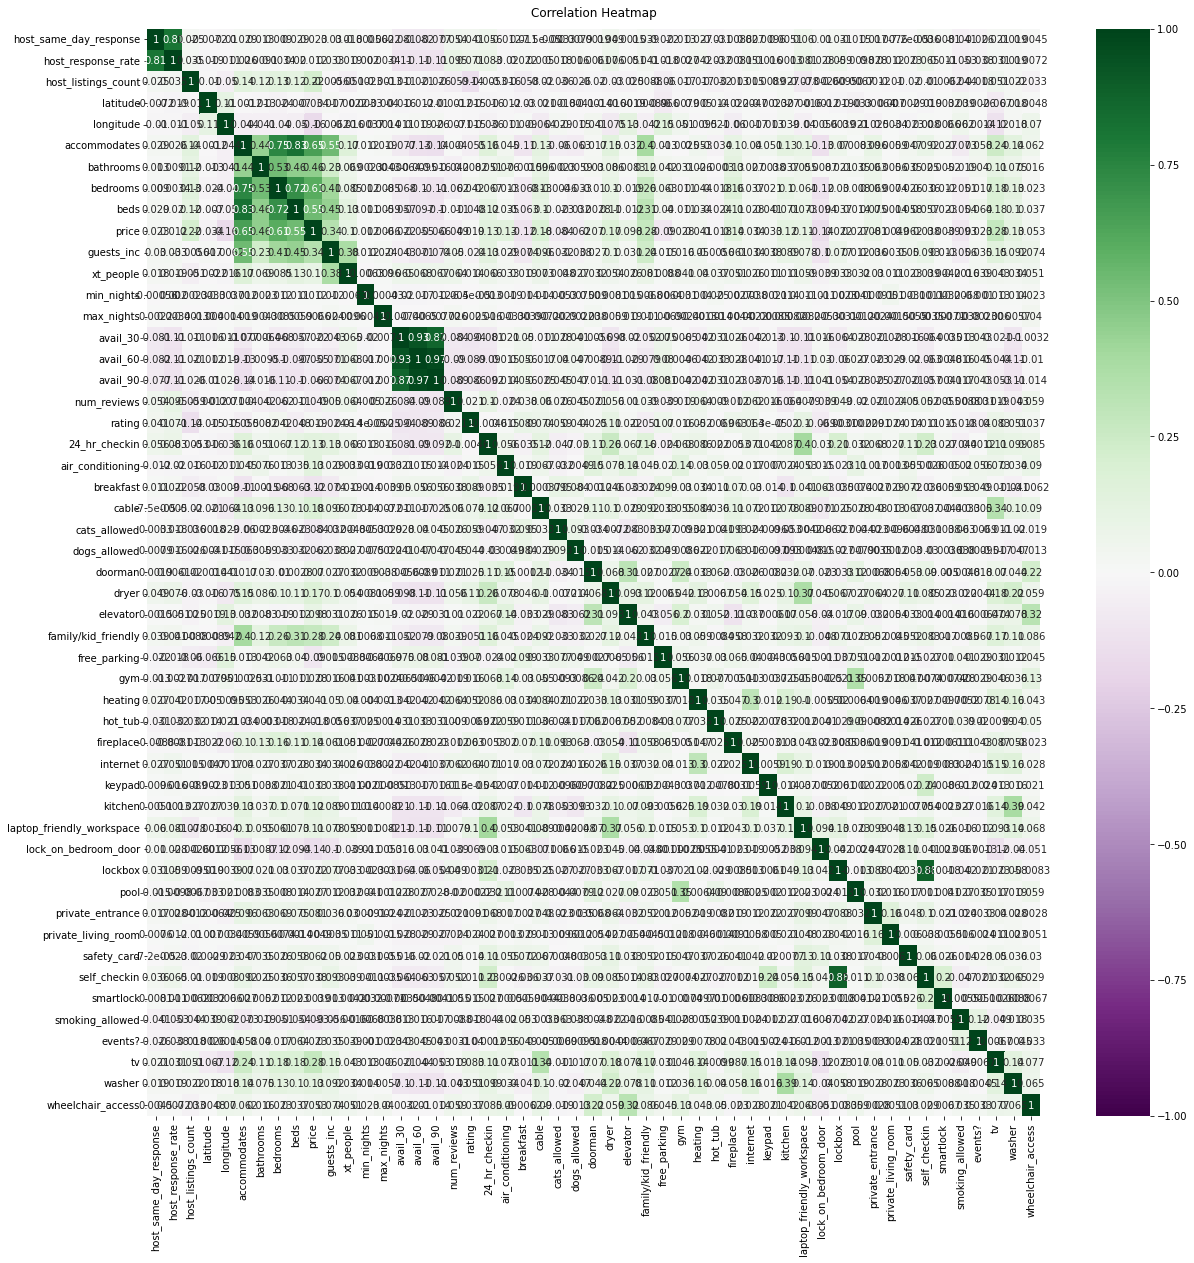

In [31]:
# Set Figure Size
plt.figure(figsize=(20,20))

# Plot
price_heatmap = sns.heatmap(
                      df.corr(),          # Create Correlation Matrix
                      vmin=-1, vmax=1,    # Set Range Values for Correlation Basis
                      annot=True,         # Visible Correlation Values
                      cmap='PRGn'         # Set Color Palette
                      )

# Titles
price_heatmap.set_title('Correlation Heatmap', pad=12);

# (Un)comment to hide/show plot
plt.show()

### Price Correlation Heatmap

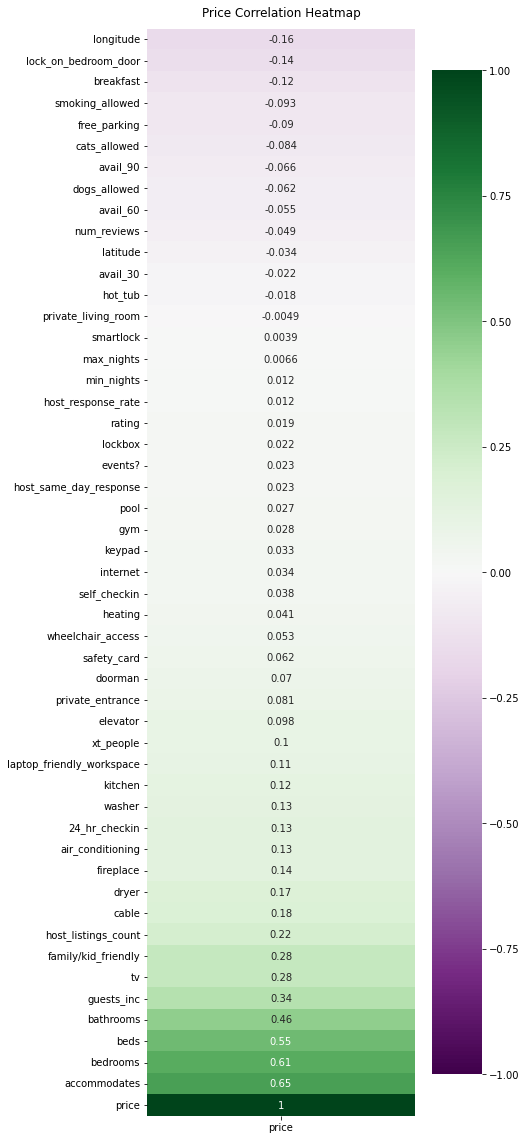

In [32]:
# Set Figure Size
plt.figure(figsize=(6,20))

# Plot
price_heatmap = sns.heatmap(
                      df.corr()[['price']].sort_values(by='price'),       
                      vmin=-1, vmax=1,    # Set Range Values for Correlation Basis
                      annot=True,         # Visible Correlation Values
                      cmap='PRGn'         # Set Color Palette
                      )

# Titles
price_heatmap.set_title('Price Correlation Heatmap', pad=12);

# (Un)comment to hide/show plot
plt.show()

### Family Friendly Heatmap

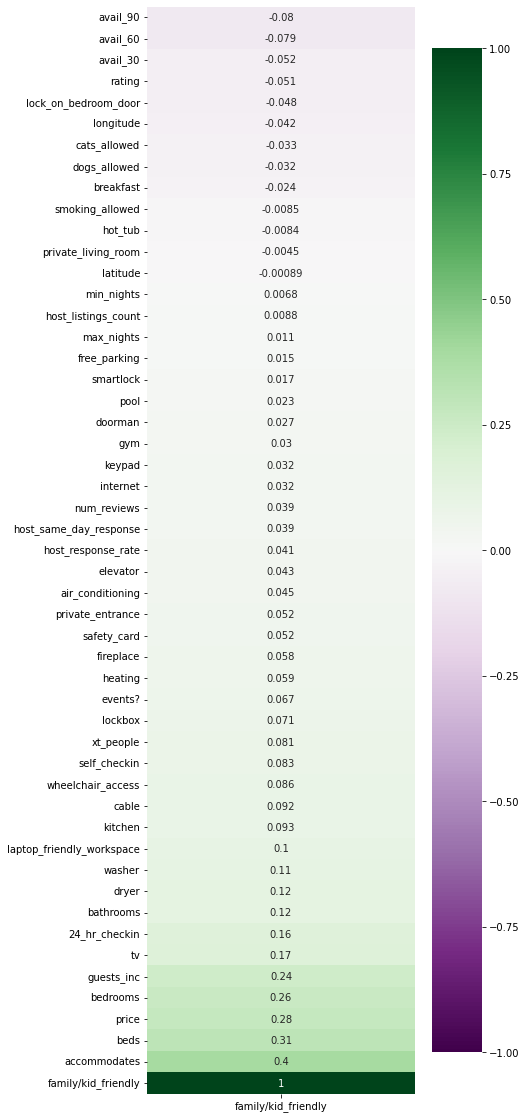

In [33]:
# Set Figure Size
plt.figure(figsize=(6,20))

# Plot
family_heatmap = sns.heatmap(
                      df.corr()[['family/kid_friendly']].sort_values(
                                                    by='family/kid_friendly'),       
                      vmin=-1, vmax=1,    # Set Range Values for Correlation Basis
                      annot=True,         # Visible Correlation Values
                      cmap='PRGn'         # Set Color Palette
                      )

# Titles
price_heatmap.set_title('Family Friendly Correlation Heatmap', pad=12);

# (Un)comment to hide/show plot
plt.show()

## Price Relationships

### Price Distribution

In [34]:
# Create Figure
price_fig = make_subplots(
    # Set Layout
    rows=1, cols=2,
    # Set Titles
    subplot_titles=[
                    'Violin with All Data Points',    # Plot 1
                    'Box and Whisker with Outliers',  # Plot 2
                    ]
)

# Add Plots to Figure
price_fig.add_trace(
                    # Plot
                    go.Box(y=df['price'], 
                    # Ploting Options
                    quartilemethod='linear',
                    boxpoints='outliers', notched=True,
                    jitter=0.3,
                    # Styling
                    marker_color='mediumseagreen',
                    ),
                    # Location
                    row=1, col=2)

price_fig.add_trace(
                    # Plot
                    go.Violin(y=df['price'],
                    # Plot Options
                    box_visible=True, meanline_visible=True,
                    points='all',
                    # Styling
                    line_color='mintcream',
                    fillcolor='mediumseagreen',
                    opacity=0.6,
                    ),
                    # Location
                    row=1, col=1)

# Add Title
price_fig.update_layout(
                      # Title
                      title_text='Price Distribution',
                      # Colors
                      plot_bgcolor='black',
                      paper_bgcolor='black',
                      )

In [35]:
df['price'].describe()

count    27117.000000
mean        96.755320
std         77.657033
min          8.000000
25%         45.000000
50%         79.000000
75%        120.000000
max        999.000000
Name: price, dtype: float64

### Price by Latitude & Longitude

In [36]:
df['price'].describe()

count    27117.000000
mean        96.755320
std         77.657033
min          8.000000
25%         45.000000
50%         79.000000
75%        120.000000
max        999.000000
Name: price, dtype: float64

In [37]:
# Create New DF for use in Plotly
llp_cols = ['price', 'latitude', 'longitude']
llp_df = df[llp_cols]
llp_df['price_range'] = ''

# Set Price Range Conditions
conditions = [
            (llp_df['price'] < 79),                               # Low
            (llp_df['price'] >= 79) & (llp_df['price'] < 120),    # Low-Mid
            (llp_df['price'] >= 120) & (llp_df['price'] <= 232),  # Mid
            (llp_df['price'] > 232) & (llp_df['price'] < 500),    # Mid-High
            (llp_df['price'] >= 500),                             # High
              ]

# Set Values
values_num = [1, 2, 3, 4, 5]
values_words = [
                'Under $79',
                '$79 - $119',
                '$120 - $232',
                '$233 - $499',
                '$500+'
                ]

# Update price range column

llp_df['price_range'] = np.select(conditions, values_words)
llp_df['cost_meter'] = np.select(conditions, values_num)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [38]:
llp_df.head()

price   latitude  longitude  price_range  cost_meter
0  120.0  51.472087  -0.206380  $120 - $232           3
3  350.0  51.473387  -0.193706  $233 - $499           4
4  180.0  51.517149  -0.225530  $120 - $232           3
5   52.0  51.489370  -0.220000    Under $79           1
7   48.0  51.513121  -0.225662    Under $79           1

In [39]:
llp_fig = px.scatter(
                    # Data & Axis
                    llp_df, x='longitude', y='latitude',
                    # Scatter Options
                    color='cost_meter', size='price',
                    # Hover Data
                    hover_name='price',
                    hover_data=['latitude', 'longitude', 'price_range',],
                    # Styling
                    opacity=0.6, template='plotly_dark',
                    color_discrete_sequence=px.colors.sequential.Blugrn,
                    # Rename Lables
                    title='AirBnB Prices London',
                    labels={
                        'price_range':'Price Range',
                        'cost_meter': '',
                        },
                     )
llp_fig

### Price by Property Type in Top 5 Neighbourhoods

In [40]:
df['prop_type'].value_counts()

Apartment          20670
House               5698
Bed & Breakfast      512
Other                176
Boat                  36
Hotel                 18
Camping                7
Name: prop_type, dtype: int64

In [41]:
# Create DF for Plotly

# List of Columns to use
ptn_cols_to_keep = ['price', 'prop_type', 'neighbourhood']
# Create New DF
ptn_df = df[ptn_cols_to_keep]

# Change Property Type Values
ptn_df['prop_type'] = ptn_df['prop_type'].replace({
                                              'Boat': 'Other',
                                              'Hotel': 'Other',
                                              'Camping': 'Other',
                                              })

# Ensure Prices are not negative
ptn_df['price'] = ptn_df['price'].abs()

# Pull Top 5 Neighbourhoods ONLY
# Save Top 5 to List
top_5_hoods = df['neighbourhood'].value_counts().head(5).index.to_list()
# Filter
ptn_df = ptn_df[ptn_df['neighbourhood'].isin(top_5_hoods)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
# Plot
ptn_fig = px.box(
                # Data
                 ptn_df, x='neighbourhood', 
                 y='price', color='prop_type',
                # Styling 
                template='plotly_dark',
                # Size
                width=900, height=600,
                # Title & Labels
                labels={'prop_type': 'property type'},
                title = 'Price by Property Type (Top 5 Neighborhoods)'
                )
# Rotate X-ticks
ptn_fig.update_xaxes(tickangle=-45)

ptn_fig

### Price by Property Type and Privacy

In [43]:
df['room_type'].value_counts()

Entire Location    14993
Private room       11806
Shared room          318
Name: room_type, dtype: int64

In [44]:
# Create DF for Plotly

# List of Columns to use
ptp_cols_to_keep = ['price', 'prop_type', 'room_type']
# Create New DF
ptp_df = df[ptp_cols_to_keep]

# Change Property Type Values
ptp_df['prop_type'] = ptp_df['prop_type'].replace({
                                              'Boat': 'Other',
                                              'Hotel': 'Other',
                                              'Camping': 'Other',
                                              })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
ptp_df.head()

price        prop_type        room_type
0  120.0        Apartment  Entire Location
3  350.0            House  Entire Location
4  180.0        Apartment  Entire Location
5   52.0  Bed & Breakfast     Private room
7   48.0        Apartment     Private room

In [46]:
# Plot
ptp_fig = px.box(
                # Data
                 ptp_df, x='prop_type', 
                 y='price', color='room_type',
                # Styling
                template='plotly_dark',
                # Size
                width=900, height=600,
                # Title & Labels
                labels={
                    'prop_type': 'property type',
                    'room_type': 'privacy'
                    },
                title = 'Price by Property Type & Privacy level'
                )
# Rotate X-ticks
ptp_fig.update_xaxes(tickangle=-45)

ptp_fig

### Vectorize House Rules for top 20 Key Words

In [47]:
# Create a Vector Representation of House Rules

# Instantiate 
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create Vocabulary & Get Word Counts per Document
dtm = tfidf.fit_transform(df['house_rules'])

# Create dtm df
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names_out())

In [48]:
print(f'dtm shape: {dtm.shape}')
dtm

dtm shape: (27117, 5000)


00  000  00am  00h  00hr  00hrs  00pm   01   06   07  ...   yo  yoga  \
0      0.0  0.0   0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.0   0.0   
1      0.0  0.0   0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.0   0.0   
2      0.0  0.0   0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.0   0.0   
3      0.0  0.0   0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.0   0.0   
4      0.0  0.0   0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.0   0.0   
...    ...  ...   ...  ...   ...    ...   ...  ...  ...  ...  ...  ...   ...   
27112  0.0  0.0   0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.0   0.0   
27113  0.0  0.0   0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.0   0.0   
27114  0.0  0.0   0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.0   0.0   
27115  0.0  0.0   0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.0   0.0   
27116  0.0  0.0   0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.0   0.0   

       yogurt  yorkshire  young  younger  yrs  yup  zero  zone  
0         0.0        0.0    0.0      0.0  0.0  0.0   0.0   0.0  
1         0.0        0.0    0.0      0.0  0.0  0.0   0.0   0.0  
2         0.0        0.0    0.0      0.0  0.0  0.0   0.0   0.0  
3         0.0        0.0    0.0      0.0  0.0  0.0   0.0   0.0  
4         0.0        0.0    0.0      0.0  0.0  0.0   0.0   0.0  
...       ...        ...    ...      ...  ...  ...   ...   ...  
27112     0.0        0.0    0.0      0.0  0.0  0.0   0.0   0.0  
27113     0.0        0.0    0.0      0.0  0.0  0.0   0.0   0.0  
27114     0.0        0.0    0.0      0.0  0.0  0.0   0.0   0.0  
27115     0.0        0.0    0.0      0.0  0.0  0.0   0.0   0.0  
27116     0.0        0.0    0.0      0.0  0.0  0.0   0.0   0.0  

[27117 rows x 5000 columns]

In [49]:
# Visualize Vectorization

# Create DF of top 20 Words with Reset Index Suitable for Plotly
top_20_words = dtm.sum(axis=0).sort_values(ascending=False).head(20).to_frame()
top_20_words = top_20_words.reset_index()
top_20_words.columns = ['Word', 'Count']

# Plot
top_20_fig = px.bar(
                    top_20_words,
                    y='Word',
                    x='Count',
                    color='Count',
                    )

# Styling
top_20_fig.update_layout(
                        title={
                            'text':'Top 20 Words',
                            'y':0.9,
                            'x':0.5,
                            'xanchor':'center',
                            'yanchor':'top'
                        },
                         template='plotly_dark'
                         )

# Model Building

## XGBoost

### Train Test Split

In [50]:
def preproc(df):
  # Drop Unused Columns
  cols_to_drop = [
                  'host_since', 'host_same_day_response',
                  'host_response_rate', 'num_reviews',
                  ]
  df = df.drop(columns=cols_to_drop)

  if 'house_rules' in df.columns:
    df = df.drop(columns='house_rules')
  if 'house_rules_tokens' in df.columns:
    df = df.drop(columns='house_rules_tokens')

  return df

In [51]:
xgb_df = preproc(df)

In [52]:
  # # Encode
  
  # le = preprocessing.OrdinalEncoder()
  # for column in df.columns:
  #   if df[column].dtype == object:
  #     df[column] = le.fit_transform(df[column])
  #   else: pass

In [53]:
# Set Target and Features
target = 'price'
# New Host
xgb_y = xgb_df[target]
xgb_X = xgb_df.drop(columns=target)

xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(
                                                    xgb_X, 
                                                    xgb_y,
                                                    test_size=0.2,
                                                    random_state=42,)

### Models

#### Base Model

In [74]:
# Make XGB Base Model Pipeline
xgb_base_model = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    XGBRegressor(random_state=42),
    )

In [75]:
# Fit
xgb_base_model.fit(xgb_X_train, xgb_y_train);

[09:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [76]:
xgb_base_model.score(xgb_X_train, xgb_y_train)

0.7445626340556848

#### Grid Search CV

## Nueral Networks

### Train Test Split

In [78]:
def encode_df(df):
  'Takes a DataFrame and Returns it with encoded data'

  # Drop Unused Columns
  cols_to_drop = [
                  'host_since', 'host_same_day_response',
                  'host_response_rate', 'num_reviews',
                  ]
  df = df.drop(columns=cols_to_drop)

  if 'house_rules' in df.columns:
    df = df.drop(columns='house_rules')
  if 'house_rules_tokens' in df.columns:
    df = df.drop(columns='house_rules_tokens')

  # Encode Each String Variable with a Corresponding Number
  df['neighbourhood'] = df['neighbourhood'].replace({
      'Tower Hamlets': 1,
      'Westminster': 2,
      'Hackney': 3,
      'Camden': 4,
      'Islington': 5,
      'Kensington and Chelsea': 6,
      'Southwark': 7,
      'Lambeth': 8,
      'Hammersmith and Fulham': 9,
      'Wandsworth': 10,
      'Haringey': 11,
      'Lewisham': 12,
      'Brent': 13,
      'Newham': 14,
      'Waltham Forest': 15,
      'Ealing': 16,
      'Greenwich': 17,
      'Barnet': 18,
      'Merton': 19,
      'City of London': 20,
      'Hounslow': 21,
      'Richmond upon Thames': 22,
      'Croydon': 23,
      'Enfield': 24,
      'Bromley': 25,
      'Other': 26,
      })

  df['prop_type'] = df['prop_type'].replace({
      'Apartment': 1,
      'Bed & Breakfast': 2,
      'Boat': 3,
      'Camping': 4,
      'Hotel': 5,
      'House': 6,
      'Other': 7, 
      })
  
  df['room_type'] = df['room_type'].replace({
      'Entire Location': 1,
      'Private Room': 2,
      'Shared Room': 3,
      })
  
  df['room_type'] = df['room_type'].replace({
      'Entire Location': 1,
      'Private room': 2,
      'Shared room': 3,
      })
  
  df['bed_type'] = df['bed_type'].replace({
      'Real Bed': 1,
      'Airbed': 2,
      'Couch': 3,
      'Futon': 4,
      'Pull-out Sofa': 5,
      })
  
  df['cancellation_policy'] = df['cancellation_policy'].replace({
      'strict': 1,
      'flexible': 2,
      'moderate': 3,
      })
  
  return df

In [79]:
# Encode DF
df_encoded = encode_df(df)

In [80]:
df_encoded.head()

host_listings_count  neighbourhood   latitude  longitude  prop_type  \
0                    1              9  51.472087  -0.206380          1   
3                    2              9  51.473387  -0.193706          6   
4                    3              9  51.517149  -0.225530          1   
5                    1              9  51.489370  -0.220000          2   
7                    1              9  51.513121  -0.225662          1   

   room_type  accommodates  bathrooms  bedrooms  beds  ...  private_entrance  \
0          1             3        1.0       1.0   1.0  ...                 0   
3          1             6        4.0       3.0   3.0  ...                 1   
4          1             2        1.0       1.0   1.0  ...                 0   
5          2             2        1.0       1.0   1.0  ...                 0   
7          2             1        1.0       1.0   1.0  ...                 0   

   private_living_room  safety_card  self_checkin  smartlock  smoking_allowed  \
0                    0            0             0          0                0   
3                    0            0             0          0                0   
4                    0            0             0          0                0   
5                    0            0             0          0                0   
7                    0            0             0          0                0   

   events?  tv  washer  wheelchair_access  
0        0   1       1                  0  
3        0   1       1                  0  
4        0   1       1                  0  
5        0   1       1                  0  
7        0   1       1                  0  

[5 rows x 53 columns]

In [81]:
# Create Train/Test Sets for Each Host Type

# Set Target and Features
target = 'price'
# New Host
y = df_encoded[target]
X = df_encoded.drop(columns=target)


In [82]:
# Scale Data
# Instantiate Scaler
scaler = StandardScaler()

# Scale X
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [83]:
# Train Test Split for Each Host Type

# New Host
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,)

### Neural Network Models

In [84]:
# Define Early Stopping for Models
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

#### Model 1

In [85]:
# Instantiate Model
model1 = models.Sequential()
# Input Layer
model1.add(layers.Dense(
                        256,
                        activation = 'relu',
                        input_dim=(X_train.shape[1]),
                        kernel_regularizer=l1(0.1),
                        ))
# Hidden Layers
model1.add(layers.Dense(
                        128,
                        activation = 'relu',
                        kernel_regularizer=l1(0.1),
                        ))
model1.add(layers.Dense(
                        64,
                        activation = 'relu',
                        kernel_regularizer=l1(0.1),
                        ))
# Output Layer
model1.add(layers.Dense(
                        1,
                        activation = 'linear',
                        kernel_regularizer=l1(0.1), 
                        ))

# Compile
model1.compile(
              loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error', 'mean_absolute_error']
              )

In [86]:
# Model Summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               13568     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 54,785
Trainable params: 54,785
Non-trainable params: 0
_________________________________________________________________


In [87]:
model1_history = model1.fit(
                       X_train,
                       y_train,
                       epochs=500,
                       batch_size=32,
                       callbacks=callback
                        )

Epoch 1/500
678/678 [==============================] - 3s 3ms/step - loss: 3283.1362 - mean_squared_error: 2979.9961 - mean_absolute_error: 31.7989
Epoch 2/500
678/678 [==============================] - 2s 3ms/step - loss: 2373.5889 - mean_squared_error: 2133.7729 - mean_absolute_error: 26.9132
Epoch 3/500
678/678 [==============================] - 2s 3ms/step - loss: 2261.7864 - mean_squared_error: 2043.2123 - mean_absolute_error: 26.4486
Epoch 4/500
678/678 [==============================] - 2s 3ms/step - loss: 2173.2373 - mean_squared_error: 1968.5045 - mean_absolute_error: 25.9023
Epoch 5/500
678/678 [==============================] - 2s 3ms/step - loss: 2066.9258 - mean_squared_error: 1869.2998 - mean_absolute_error: 25.2112
Epoch 6/500
678/678 [==============================] - 2s 3ms/step - loss: 1959.2324 - mean_squared_error: 1767.2761 - mean_absolute_error: 24.6220
Epoch 7/500
678/678 [==============================] - 2s 3ms/step - loss: 1890.3837 - mean_squared_error: 1702.

#### Model 2

In [88]:
# Instantiate Model
model2 = models.Sequential()
# Input Layer
model2.add(layers.Dense(
                        256,
                        activation = 'relu',
                        input_dim=(X_train.shape[1]),
                        kernel_regularizer=l1(0.1),
                        ))
# Hidden Layers
model2.add(layers.Dense(
                        128,
                        activation = 'relu',
                        kernel_regularizer=l1(0.1),
                        ))
model2.add(layers.Dense(
                        128,
                        activation = 'relu',
                        kernel_regularizer=l1(0.1),
                        ))
model2.add(layers.Dense(
                        64,
                        activation = 'relu',
                        kernel_regularizer=l1(0.1),
                        ))
# Output Layer
model2.add(layers.Dense(
                        1,
                        activation = 'linear',
                        kernel_regularizer=l1(0.1), 
                        ))

# Compile
model2.compile(
              loss='huber_loss',
              optimizer='adam',
              metrics=['mean_squared_error', 'mean_absolute_error']
              )

In [89]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               13568     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 71,297
Trainable params: 71,297
Non-trainable params: 0
_________________________________________________________________


In [90]:
model2_history = model2.fit(
                       X_train,
                       y_train,
                       epochs=500,
                       batch_size=32,
                       callbacks=callback
                        )

Epoch 1/500
678/678 [==============================] - 3s 3ms/step - loss: 115.8830 - mean_squared_error: 11503.2510 - mean_absolute_error: 75.1134
Epoch 2/500
678/678 [==============================] - 2s 3ms/step - loss: 56.8727 - mean_squared_error: 6693.2456 - mean_absolute_error: 50.2602
Epoch 3/500
678/678 [==============================] - 2s 3ms/step - loss: 55.5864 - mean_squared_error: 6654.8296 - mean_absolute_error: 50.2415
Epoch 4/500
678/678 [==============================] - 2s 4ms/step - loss: 54.9367 - mean_squared_error: 6642.6279 - mean_absolute_error: 50.2119
Epoch 5/500
678/678 [==============================] - 2s 3ms/step - loss: 54.5387 - mean_squared_error: 6628.1113 - mean_absolute_error: 50.2095
Epoch 6/500
678/678 [==============================] - 2s 3ms/step - loss: 54.2059 - mean_squared_error: 6631.8501 - mean_absolute_error: 50.2102
Epoch 7/500
678/678 [==============================] - 2s 3ms/step - loss: 53.8826 - mean_squared_error: 6622.0537 - mean_

#### Model 3

In [91]:
# Instantiate Model
model3 = models.Sequential()
# Input Layer
model3.add(layers.Dense(
                        256,
                        activation = 'relu',
                        input_dim=(X_train.shape[1]),
                        kernel_regularizer=l2(0.1),
                        ))
# Hidden Layers
model3.add(layers.Dense(
                        128,
                        activation = 'relu',
                        kernel_regularizer=l2(0.1),
                        ))
model3.add(layers.Dense(
                        128,
                        activation = 'relu',
                        kernel_regularizer=l2(0.1),
                        ))
model3.add(layers.Dense(
                        64,
                        activation = 'relu',
                        kernel_regularizer=l2(0.1),
                        ))
# Output Layer
model3.add(layers.Dense(
                        1,
                        activation = 'linear',
                        kernel_regularizer=l2(0.1), 
                        ))

# Compile
model3.compile(
              loss='huber_loss',
              optimizer='adam',
              metrics=['mean_squared_error', 'mean_absolute_error']
              )

In [92]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               13568     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 71,297
Trainable params: 71,297
Non-trainable params: 0
_________________________________________________________________


In [93]:
model3_history = model3.fit(
                       X_train,
                       y_train,
                       epochs=500,
                       batch_size=32,
                       callbacks=callback
                        )

Epoch 1/500
678/678 [==============================] - 3s 3ms/step - loss: 41.1009 - mean_squared_error: 3199.0532 - mean_absolute_error: 31.2416
Epoch 2/500
678/678 [==============================] - 2s 3ms/step - loss: 30.1027 - mean_squared_error: 2333.5244 - mean_absolute_error: 26.2428
Epoch 3/500
678/678 [==============================] - 2s 3ms/step - loss: 29.1240 - mean_squared_error: 2269.9841 - mean_absolute_error: 25.9622
Epoch 4/500
678/678 [==============================] - 2s 3ms/step - loss: 28.6664 - mean_squared_error: 2257.4221 - mean_absolute_error: 25.6681
Epoch 5/500
678/678 [==============================] - 2s 3ms/step - loss: 28.2000 - mean_squared_error: 2219.0803 - mean_absolute_error: 25.2447
Epoch 6/500
678/678 [==============================] - 2s 3ms/step - loss: 27.8999 - mean_squared_error: 2164.9941 - mean_absolute_error: 24.8955
Epoch 7/500
678/678 [==============================] - 2s 3ms/step - loss: 27.8821 - mean_squared_error: 2156.9880 - mean_ab

#### Model 4

In [94]:
# Instantiate Model
model4 = models.Sequential()
# Input Layer
model4.add(layers.Dense(
                        256,
                        activation = 'relu',
                        input_dim=(X_train.shape[1]),
                        kernel_regularizer=l2(0.1),
                        ))
# Hidden Layers
model4.add(layers.Dense(
                        128,
                        activation = 'relu',
                        kernel_regularizer=l2(0.1),
                        ))
model4.add(layers.Dense(
                        64,
                        activation = 'relu',
                        kernel_regularizer=l2(0.1),
                        ))
# Output Layer
model4.add(layers.Dense(
                        1,
                        activation = 'linear',
                        kernel_regularizer=l2(0.1), 
                        ))

# Compile
model4.compile(
              loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error', 'mean_absolute_error']
              )

In [95]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               13568     
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 54,785
Trainable params: 54,785
Non-trainable params: 0
_________________________________________________________________


In [96]:
model4_history = model4.fit(
                       X_train,
                       y_train,
                       epochs=500,
                       batch_size=32,
                       callbacks=callback
                        )

Epoch 1/500
678/678 [==============================] - 3s 3ms/step - loss: 3038.4148 - mean_squared_error: 3001.0605 - mean_absolute_error: 31.6002
Epoch 2/500
678/678 [==============================] - 2s 3ms/step - loss: 2146.9609 - mean_squared_error: 2112.6279 - mean_absolute_error: 26.8093
Epoch 3/500
678/678 [==============================] - 2s 3ms/step - loss: 2066.7549 - mean_squared_error: 2032.5630 - mean_absolute_error: 26.2824
Epoch 4/500
678/678 [==============================] - 2s 3ms/step - loss: 1945.3411 - mean_squared_error: 1909.4672 - mean_absolute_error: 25.5168
Epoch 5/500
678/678 [==============================] - 2s 3ms/step - loss: 1886.0032 - mean_squared_error: 1847.2501 - mean_absolute_error: 24.9104
Epoch 6/500
678/678 [==============================] - 2s 3ms/step - loss: 1773.2587 - mean_squared_error: 1730.8660 - mean_absolute_error: 24.1464
Epoch 7/500
678/678 [==============================] - 2s 3ms/step - loss: 1672.0579 - mean_squared_error: 1626.

### Save Best Model

In [97]:
# Save Model to Disk
model4.save('/Users/xlusc/Downloads')

INFO:tensorflow:Assets written to: /Users/xlusc/Downloads/assets
